# **The Monty Hall Problem and Conditional Probability in Fraud Detection**

By: Linet Shammah Patriciah.

# **Monty Hall Simulation**

In [1]:
import random

def monty_hall_sim(trials=1000, switch=True):
    wins = 0
    for _ in range(trials):
        car = random.randint(0, 2)
        choice = random.randint(0, 2)
        if switch:
            # host opens a goat door
            remaining_doors = [i for i in range(3) if i != choice and i != car]
            # switch to the other door
            choice = [i for i in range(3) if i != choice and i != remaining_doors[0]][0]
        if choice == car:
            wins += 1
    return wins / trials

print("Win rate when switching:", monty_hall_sim(switch=True))
print("Win rate when staying:", monty_hall_sim(switch=False))


Win rate when switching: 0.68
Win rate when staying: 0.309


# **Conditional Probability in Fraud Detection**

In [3]:
# importing the neccessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## **DATA**

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [5]:
import os

# List files in the downloaded dataset folder
print(os.listdir(path))

['creditcard.csv']


In [6]:
import pandas as pd

# Construct the full path to the CSV file
csv_file = os.path.join(path, 'creditcard.csv')

# Loading the csv into pandas
credit_card = pd.read_csv(csv_file)

# Checking the first few rows
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# checking the last rows on the dataset
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_card.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
credit_card.nunique()

,0
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


In [12]:
credit_card.duplicated().sum()

np.int64(1081)

In [13]:
credit_card=credit_card.drop_duplicates()

# Exploratory Data Analysis

In [ ]:
# Descriptive Statistics.
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [11]:
credit_card.corr()['Class'].sort_values(ascending=False)

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


In [14]:
credit_card['Class'].value_counts()

,count
Class,
0,283253
1,473


In [18]:
fraud = credit_card[credit_card['Class'] == 1]
non_fraud = credit_card[credit_card['Class'] == 0]

In [19]:
fraud.Amount.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [20]:
non_fraud.Amount.describe()

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


## Class Distribution (Fraud vs Non-Fraud)

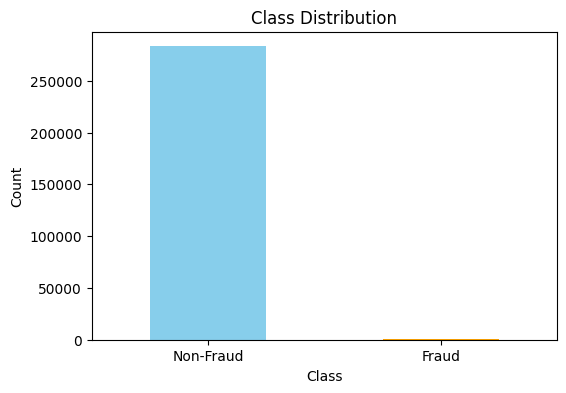

In [21]:
class_counts = credit_card['Class'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

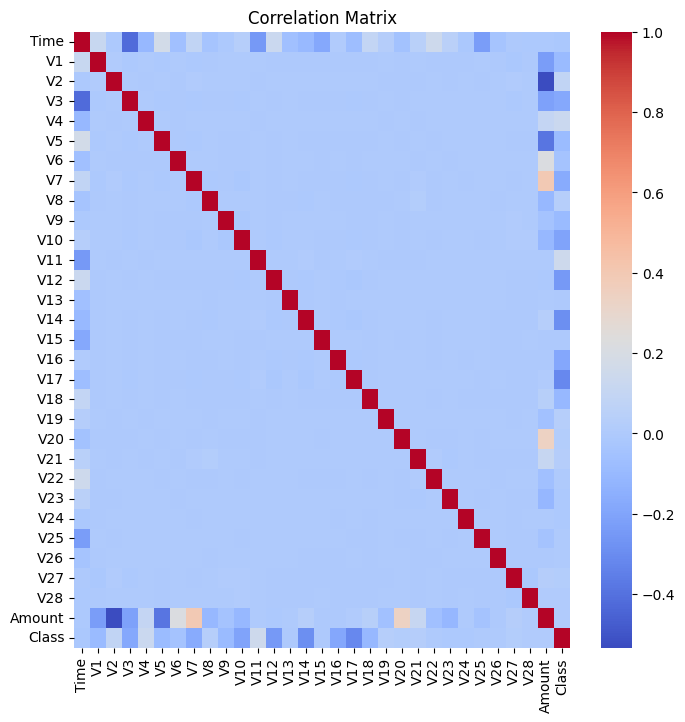

In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(credit_card.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

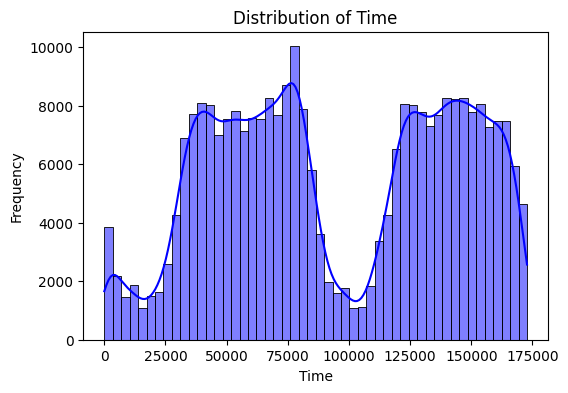

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(credit_card['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

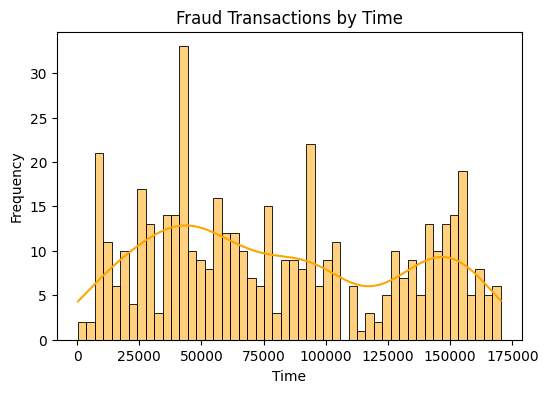

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(fraud['Time'], bins=50, kde=True, color='orange')
plt.title('Fraud Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

## Outliers.

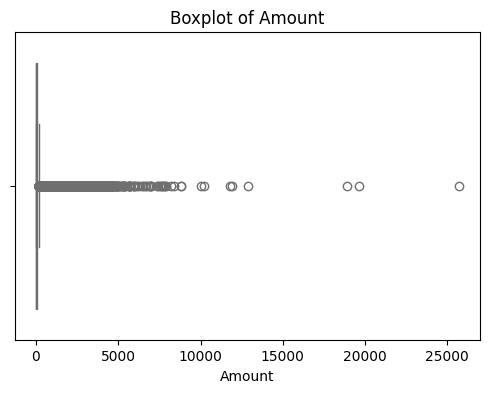

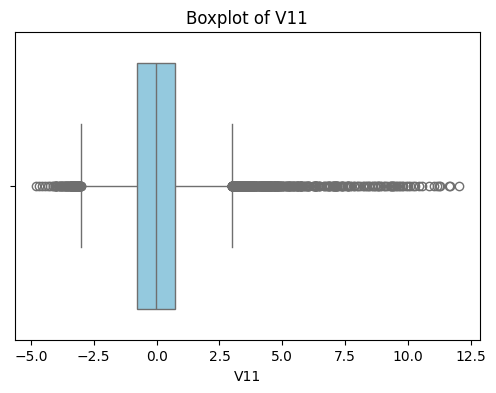

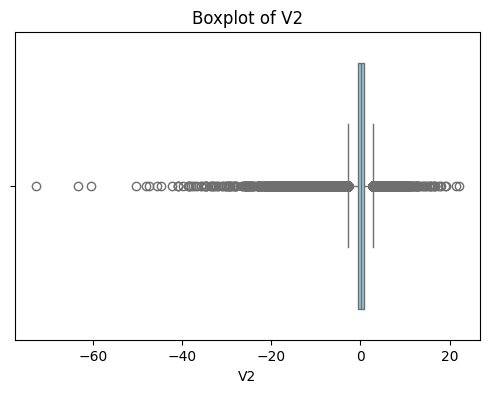

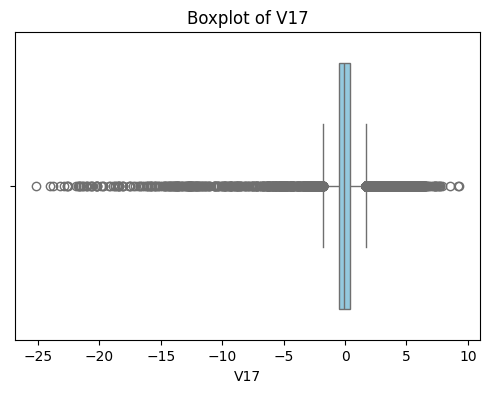

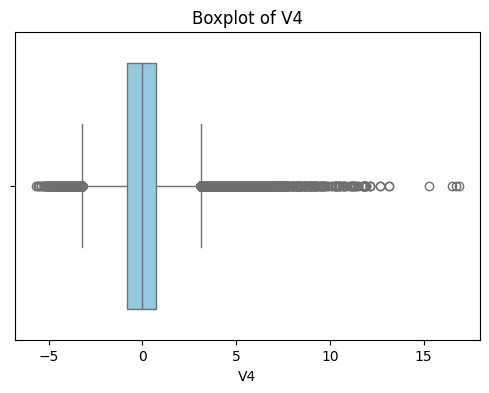

In [26]:
features = ['Amount', 'V11', 'V2', 'V17', 'V4']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=credit_card[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

## X(Independent Variable) and Y(Dependent Variable)

In [27]:
X=credit_card.drop(columns='Class')

y=credit_card['Class']

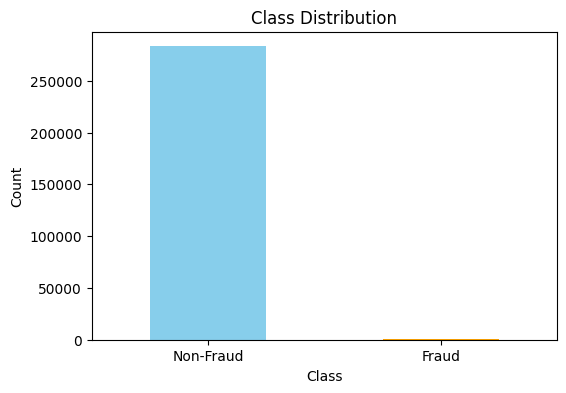

In [28]:
class_counts = y.value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

# **Train - Test Data**

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

The Class distribution is Imbalanced so we will try to balance it using SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression

In [33]:
LG = LogisticRegression()
LG.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [34]:
y_pred_Test = LG.predict(X_test)
y_predTrain=LG.predict(X_train_resampled)

In [35]:
y_predTest=LG.predict(X_test)
y_predTrain=LG.predict(X_train_resampled)

In [36]:
print("\nAccuracy Score:")

print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")

print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")


Accuracy Score:
Train Accuracy: 0.9754569686057493
Test Accuracy: 0.9827829274310084


In [39]:
print("\nClassification Report (Test):")
print(classification_report(y_test, y_predTest))


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.08      0.87      0.15        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.57     56746
weighted avg       1.00      0.98      0.99     56746



In [40]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[55686   965]
 [   12    83]]


# XGB Classifier

In [41]:
model = XGBClassifier(
    n_estimators=500,          # Reduce the number of trees
    learning_rate=0.1,         # Use a smaller learning rate
    max_depth=4,               # Reduce tree depth
    min_child_weight=3,        # Increase minimum child weight
    subsample=0.7,             # Use a subset of the data for training
    colsample_bytree=0.7,      # Use a subset of features for training
    gamma=1,                   # Minimum loss reduction required for split
    reg_alpha=2,               # Increase L1 regularization
    reg_lambda=2               # Increase L2 regularization
)
model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
y_predTest=model.predict(X_test)
y_predTrain=model.predict(X_train_resampled)

# Evaluation

In [44]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Accuracy Score:
Train Accuracy: 0.9999293916205506
Test Accuracy: 0.9992069925633524
Cross-Validation Accuracy: 0.9996


In [46]:
print("\nPrecision Score:")

print(f"Train Precision: {precision_score(y_train_resampled, y_predTrain)}")

print(f"Test Precision: {precision_score(y_test, y_predTest)}")


Precision Score:
Train Precision: 0.9998588031804584
Test Precision: 0.7450980392156863


In [45]:
print("\nRecall Score:")

print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain)}")

print(f"Test Recall: {recall_score(y_test, y_predTest)}")


Recall Score:
Train Recall: 1.0
Test Recall: 0.8


In [47]:
print("\nClassification Report (Test):")

print(classification_report(y_test, y_predTest))


Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.75      0.80      0.77        95

    accuracy                           1.00     56746
   macro avg       0.87      0.90      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [48]:
print("Confusion Matrix (Test):")

print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[56625    26]
 [   19    76]]
